In [1]:
# 임포트 
# 데이터 불러오기
# 데이터 특징 확인
 # 상관관계 분석
 # 통계 처리
# 결측값 확인
# 이상값 확인
# 모델링

In [2]:
# 임포트
import os
os.chdir('/Users/jiyongkim/PycharmProjects/house_price_predict/')
from utils.utils_preprocess import *
from train.preprocess import *
from utils.utils_train import *
from utils.utils_optuna import *
from train.model import final_model_result

In [3]:
train_df, test_df = read_data()

In [4]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500



 mu = 180921.20 and sigma = 79415.29



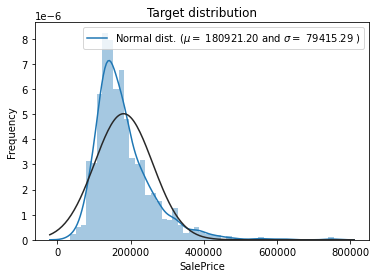

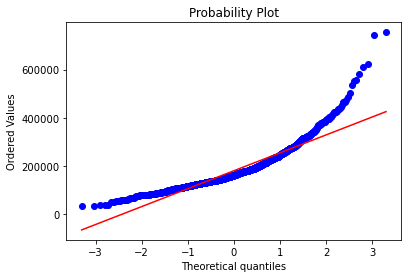

In [5]:
# 학습 데이터의 target 분석
plot_norm_skew_stats_target(train_df, 'SalePrice')


 mu = 12.02 and sigma = 0.40



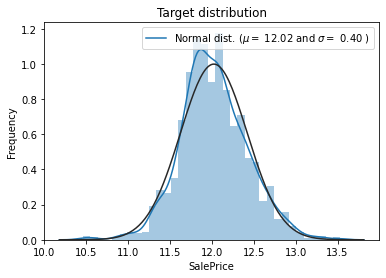

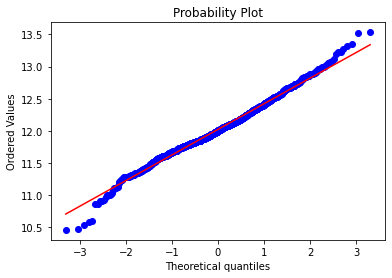

In [6]:
train_df_target_log_transform = get_log_transform(train_df, 'SalePrice')

In [7]:
train_df_target_log_transform

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GL

In [8]:
train_df_target_log_transform['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [9]:
# 결측값 처리

In [10]:
missing_data_train = get_missing_data_percentage(train_df)
missing_data_test = get_missing_data_percentage(test_df)

In [11]:
missing_data_train.head(2)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014


In [12]:
missing_data_test.head(2)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045


In [13]:
# 학습/테스트 합쳐서 일괄 처리
all_data, n_train, y_train_df = concat_train_test(train_df_target_log_transform, test_df, 'SalePrice')

all_data size is : (2919, 80)


In [14]:
missing_data_all = get_missing_data_percentage(all_data)
missing_data_all.head(2)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029


In [15]:
all_data = preprocess_missing_data(all_data, train_df, test_df)

In [16]:
get_missing_data_remaining(all_data)

,Missing Ratio


In [17]:
# 연속형 변수
# 범주형 변수 
category_feature, int64_feature, float64_feature = get_numerous_category_feature(train_df)

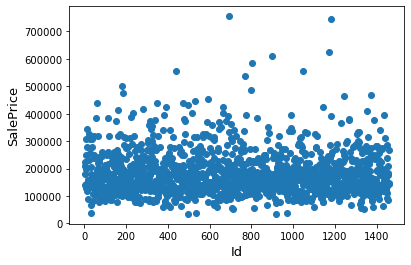

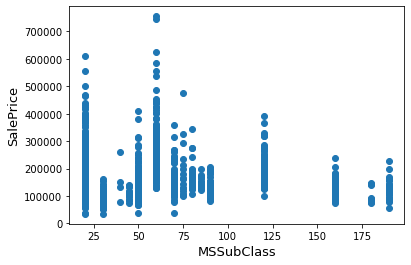

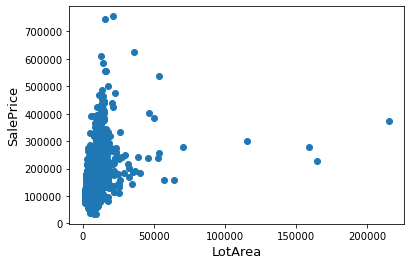

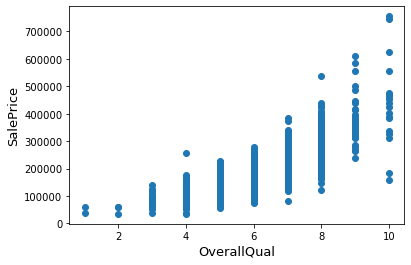

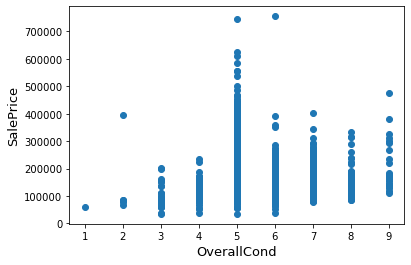

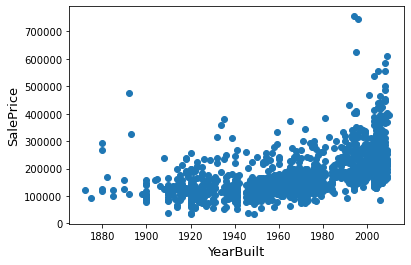

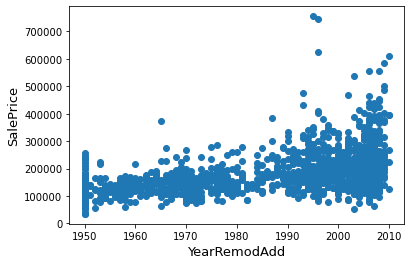

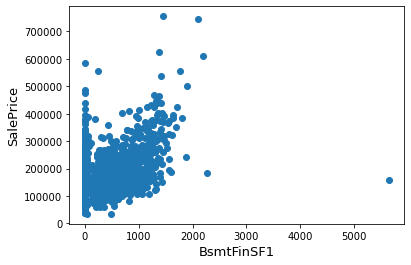

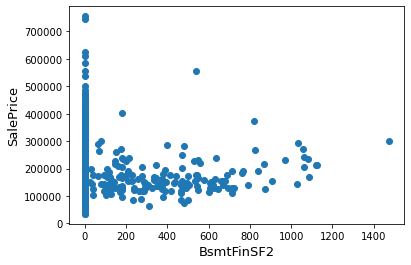

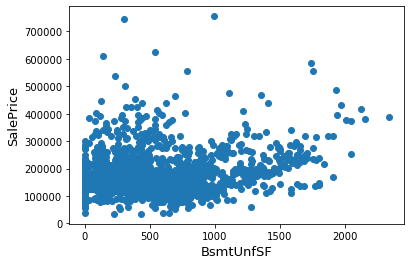

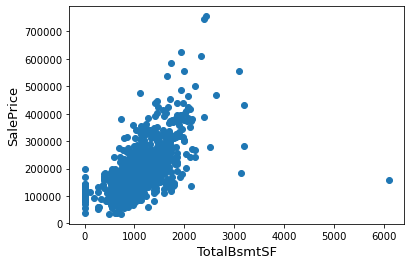

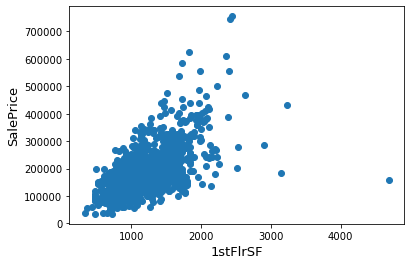

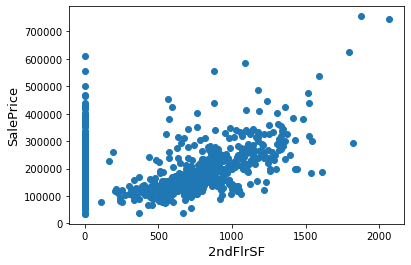

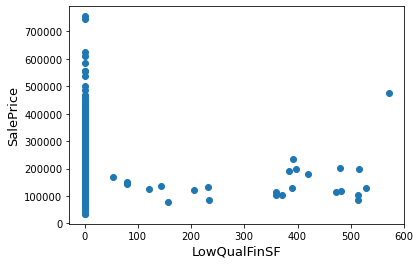

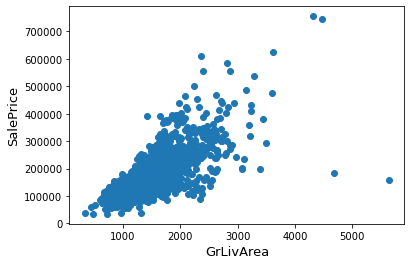

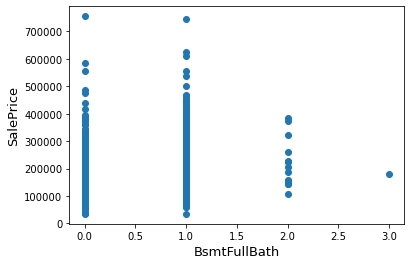

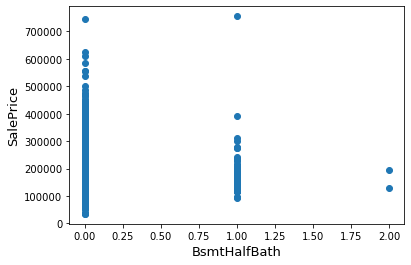

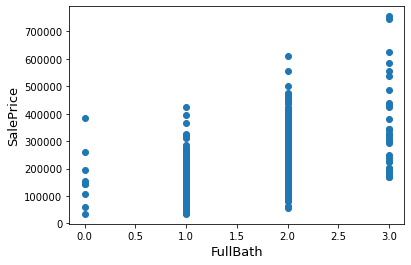

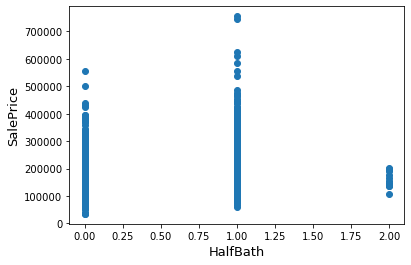

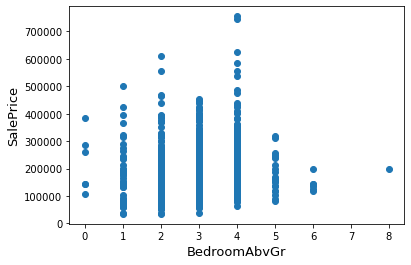

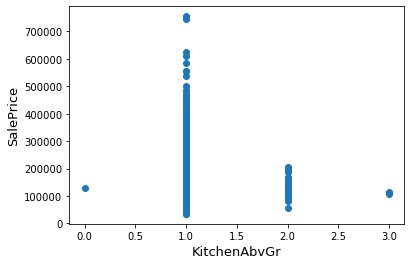

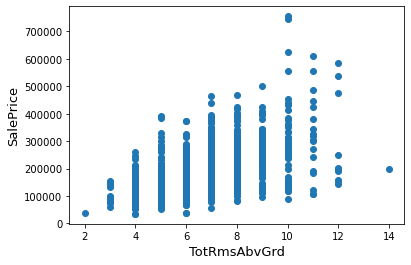

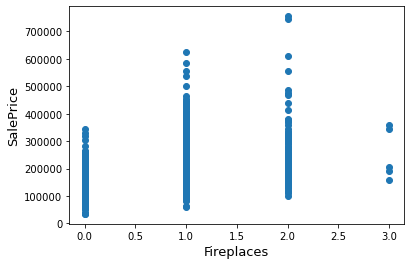

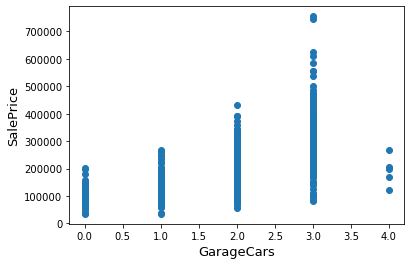

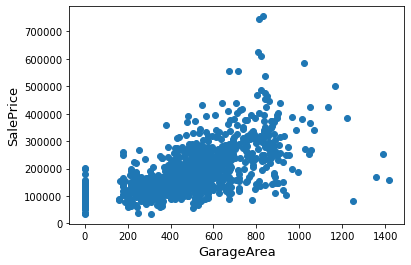

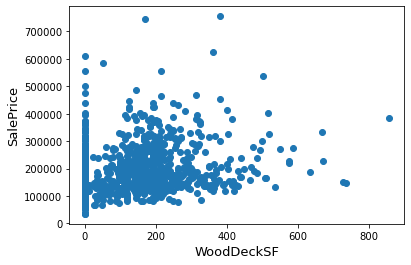

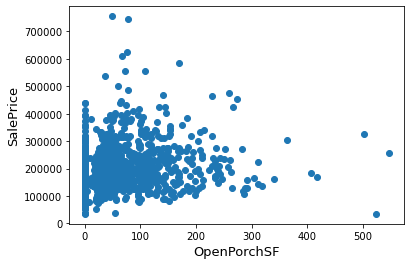

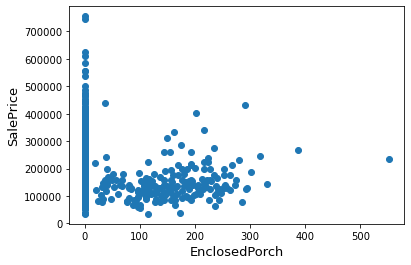

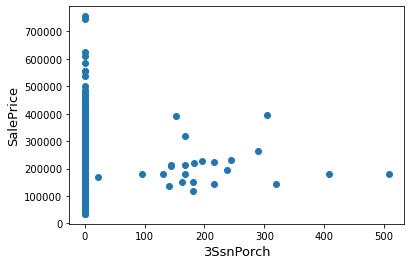

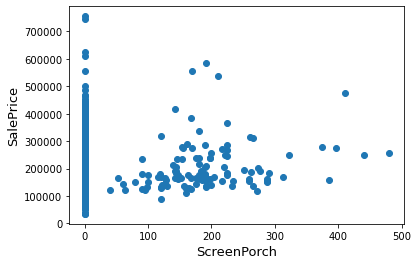

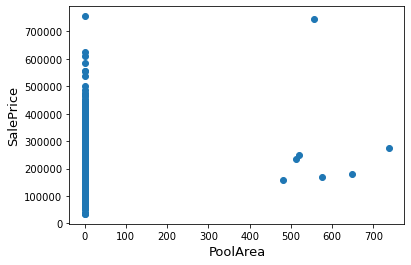

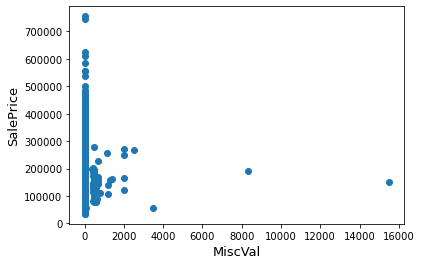

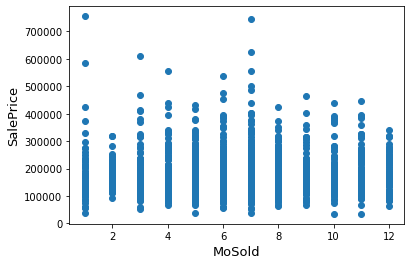

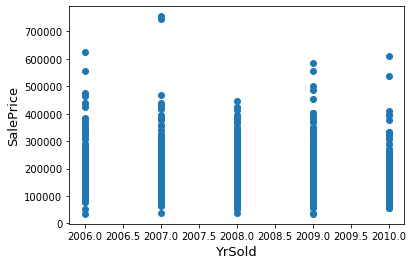

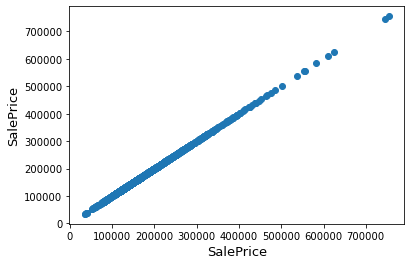

In [18]:
for feature in int64_feature:
    plot_corr(train_df, feature, 'SalePrice')

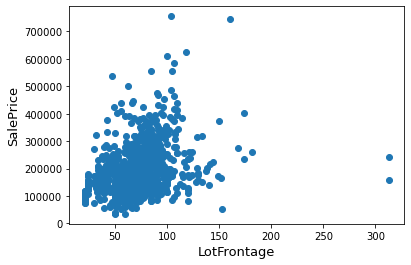

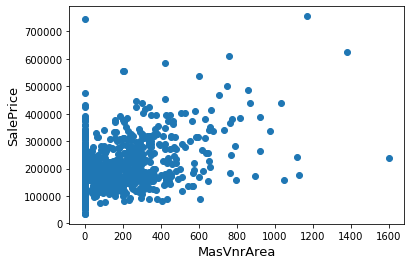

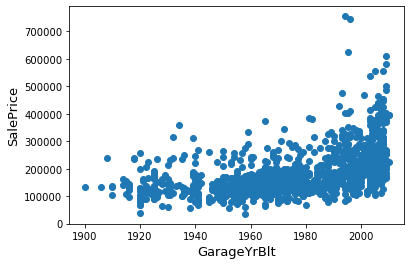

In [19]:
for feature in float64_feature:
    plot_corr(train_df, feature, 'SalePrice')

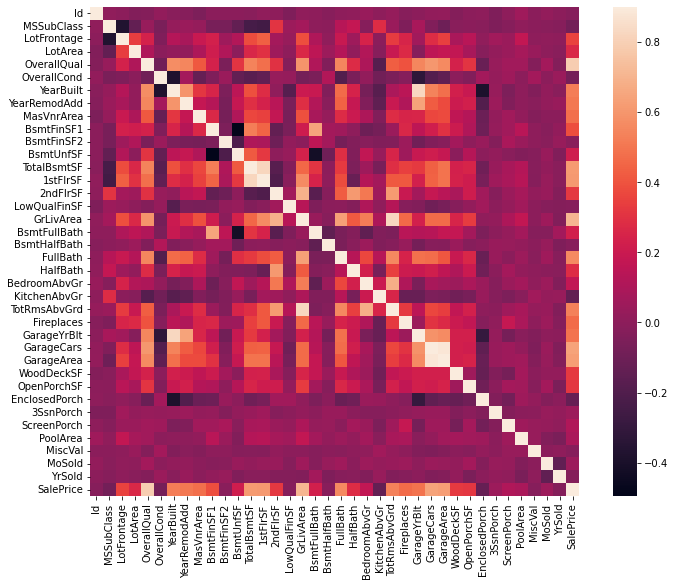

In [20]:
plot_all_corr(train_df)

In [21]:
# 추가 FE

In [22]:
all_data = preprocess_feature_encoding(all_data)

Shape all_data: (2919, 80)


In [23]:
# 피처 추가
# 면적 관련 특성은 집값을 결정하는 데 매우 중요하므로 
# 각 주택의 지하실, 1층 및 2층 면적의 총 면적인 특성을 추가
all_data['TotalSF'] = \
    all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [24]:
# skew 특징 파악
all_data = preprocess_skew_features(all_data, skew_threshold=0.75, skew_lambda=0.15)

                    Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
LandSlope       4.975157
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694
BsmtHalfBath    3.931594
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
LotFrontage     1.498578
1stFlrSF        1.469604
BsmtFinSF1      1.425230
GrLivArea       1.269358
TotalBsmtSF     1.156894
BsmtUnfSF       0.919339
2ndFlrSF        0.861675
TotRmsAbvGrd    0.758367
Fireplaces      0.733495
HalfBath        0.694566
BsmtFullBath    0.624832
OverallCond     0.570312
HeatingQC       0.486656
FireplaceQu     0.333787
BedroomAbvGr    0.326324
GarageArea      0.239257
OverallQual     0.197110
FullBath        0.167606
MSSubClass      0.138396
YrSold          0.132399
BsmtFinType1    0.084633
Id              0.000000
GarageCars     -0.219581
YearRemodAdd   -0.451020


In [25]:
# 더미변수 생성
all_data = get_dummy(all_data)

(2919, 223)


In [26]:
train_df, test_df_no_target = get_train_test(all_data, n_train)

In [27]:
train_df.drop('Id', axis = 1, inplace=True)

In [28]:
# 학습/테스트 데이터 분리
# 2차 이상값 처리 (모델 기반)

In [29]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [30]:
train_df, no_outlier_train_df, no_outlier_y_train_df, test_df_no_target = get_outlier_label_by_ecod(train_df, test_df_no_target, y_train_df)

In [31]:
# 모델링

In [32]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [33]:
feature_cols = no_outlier_train_df.columns.tolist()

In [34]:
X_train = no_outlier_train_df.copy()
X_test = test_df_no_target[feature_cols]
y_train = no_outlier_y_train_df.copy()

In [35]:
category_feature, int64_feature, float64_feature = get_numerous_category_feature(X_train)

In [36]:
# 튜닝한 하이퍼파라미터 기반으로 모델 최종 구축
lasso, ENet = get_robust_pipeline()
model_xgb = final_xgboost(X_train, y_train, X_test, category_feature)
model_cat = final_catboost(X_train, y_train, X_test, category_feature)

[I 2022-10-28 23:59:29,640] A new study created in memory with name: no-name-8c2d3023-8126-4fae-a314-80442b8b3acb


error type: rmse, error: 0.10052
error type: rmse, error: 0.10256
error type: rmse, error: 0.12255
error type: rmse, error: 0.10502


[I 2022-10-28 23:59:47,032] Trial 0 finished with value: 0.11034346541216096 and parameters: {'lambda': 8.058158626084592e-05, 'alpha': 4.80178459050871e-05, 'colsample_bytree': 0.48749724920319687, 'subsample': 0.8175674821880174, 'learning_rate': 0.023735450147156282, 'n_estimators': 1758, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 0 with value: 0.11034346541216096.


error type: rmse, error: 0.12106
error type: rmse, error: 0.10199
error type: rmse, error: 0.10023
error type: rmse, error: 0.11433
error type: rmse, error: 0.11020


[I 2022-10-29 00:01:05,828] Trial 1 finished with value: 0.10781080991960612 and parameters: {'lambda': 1.0731768037072293, 'alpha': 2.2623905831610074, 'colsample_bytree': 0.6688680774088502, 'subsample': 0.7230230062146457, 'learning_rate': 0.011643162287540944, 'n_estimators': 1274, 'max_depth': 10, 'min_child_weight': 7}. Best is trial 1 with value: 0.10781080991960612.


error type: rmse, error: 0.11230
error type: rmse, error: 0.11384
error type: rmse, error: 0.10541
error type: rmse, error: 0.12014
error type: rmse, error: 0.09545


[I 2022-10-29 00:01:52,046] Trial 2 finished with value: 0.10913469202918738 and parameters: {'lambda': 0.00013496813866120143, 'alpha': 2.848813676735032, 'colsample_bytree': 0.550228008570504, 'subsample': 0.8514886862851954, 'learning_rate': 0.02007326811218077, 'n_estimators': 2058, 'max_depth': 7, 'min_child_weight': 10}. Best is trial 1 with value: 0.10781080991960612.


error type: rmse, error: 0.11082


[I 2022-10-29 00:02:00,667] A new study created in memory with name: no-name-e877bf3b-8f11-4288-a1d5-086bebb1d271


saving model...models/XGBRegressor-0.10781.npy
error type: rmse, error: 0.10751
error type: rmse, error: 0.11714
error type: rmse, error: 0.10567
error type: rmse, error: 0.09518


[I 2022-10-29 00:03:27,660] Trial 0 finished with value: 0.1070034072831729 and parameters: {'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'od_type': 'Iter', 'colsample_bylevel': 0.07593418286723318, 'l2_leaf_reg': 1.4444723410794678e-06, 'learning_rate': 0.03516867113038711, 'iterations': 1507, 'min_child_samples': 4, 'depth': 10, 'bagging_temperature': 3.3683729961179374}. Best is trial 0 with value: 0.1070034072831729.


error type: rmse, error: 0.10952
error type: rmse, error: 0.15126
error type: rmse, error: 0.15111
error type: rmse, error: 0.15358
error type: rmse, error: 0.14741


[I 2022-10-29 00:03:29,706] Trial 1 finished with value: 0.15076925271257569 and parameters: {'bootstrap_type': 'Bernoulli', 'boosting_type': 'Plain', 'od_type': 'IncToDec', 'colsample_bylevel': 0.037315846287611344, 'l2_leaf_reg': 7.372443069650354e-06, 'learning_rate': 0.4644338114678622, 'iterations': 961, 'min_child_samples': 7, 'depth': 11, 'subsample': 0.7502106346367008}. Best is trial 0 with value: 0.1070034072831729.


error type: rmse, error: 0.15048
error type: rmse, error: 0.09934
error type: rmse, error: 0.11168
error type: rmse, error: 0.10375
error type: rmse, error: 0.12460


[I 2022-10-29 00:04:04,358] Trial 2 finished with value: 0.10859772786774893 and parameters: {'bootstrap_type': 'Bernoulli', 'boosting_type': 'Ordered', 'od_type': 'IncToDec', 'colsample_bylevel': 0.06813955976184692, 'l2_leaf_reg': 0.42677365342580253, 'learning_rate': 0.08721395400795565, 'iterations': 1448, 'min_child_samples': 11, 'depth': 10, 'subsample': 0.5297071863643674}. Best is trial 0 with value: 0.1070034072831729.


error type: rmse, error: 0.10362
saving model...models/CatBoostRegressor-0.10700.npy


In [37]:
# 베이스모델 스코어 확인
score = rmsle_cv(lasso, X_train, y_train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0992 (0.0069)



In [38]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, model_xgb),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models, X_train, y_train)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.0986 (0.0074)


In [39]:
ensemble = final_model_result(stacked_averaged_models, model_cat, X_train, y_train, X_test)

0.08791515840920332
0:	learn: 0.3342278	total: 40.6ms	remaining: 1m 1s
1:	learn: 0.3262333	total: 71.3ms	remaining: 53.7s
2:	learn: 0.3192165	total: 89.2ms	remaining: 44.7s
3:	learn: 0.3125558	total: 124ms	remaining: 46.5s
4:	learn: 0.3052346	total: 164ms	remaining: 49.3s
5:	learn: 0.2980946	total: 171ms	remaining: 42.9s
6:	learn: 0.2912111	total: 206ms	remaining: 44.1s
7:	learn: 0.2851571	total: 212ms	remaining: 39.7s
8:	learn: 0.2791375	total: 251ms	remaining: 41.8s
9:	learn: 0.2721280	total: 275ms	remaining: 41.2s
10:	learn: 0.2659694	total: 326ms	remaining: 44.3s
11:	learn: 0.2602163	total: 364ms	remaining: 45.4s
12:	learn: 0.2552220	total: 406ms	remaining: 46.7s
13:	learn: 0.2501250	total: 424ms	remaining: 45.2s
14:	learn: 0.2444475	total: 443ms	remaining: 44.1s
15:	learn: 0.2392617	total: 490ms	remaining: 45.7s
16:	learn: 0.2344173	total: 536ms	remaining: 46.9s
17:	learn: 0.2294886	total: 581ms	remaining: 48s
18:	learn: 0.2246341	total: 614ms	remaining: 48.1s
19:	learn: 0.2200581

In [ ]:
####

In [40]:
# 테스트 ID 별 예측값 정리
test_df_id = test_df['Id']

sub = pd.DataFrame()
sub['Id'] = test_df_id
sub['SalePrice'] = ensemble
# sub.to_csv('submission.csv',index=False)